## <font color=blue>01 Movie Reviews</font>
*  Read __fandango_score_comparison.csv__ into a Dataframe named __movies__.
*  Display the __movies__ DataFrame by just typing the variable name and running the code cell.
*  If you're unfamiliar with RottenTomatoes, Metacritic, IMDB, or Fandango, visit the websites to get a better handle on their review methodology.

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from scipy.stats import linregress

In [59]:
movies = pd.read_csv('fandango_score_comparison.csv')
print('fandango_score_comparison columns')
for c in movies.columns:
    print('\t-', c)

fandango_score_comparison columns
	- FILM
	- RottenTomatoes
	- RottenTomatoes_User
	- Metacritic
	- Metacritic_User
	- IMDB
	- Fandango_Stars
	- Fandango_Ratingvalue
	- RT_norm
	- RT_user_norm
	- Metacritic_norm
	- Metacritic_user_nom
	- IMDB_norm
	- RT_norm_round
	- RT_user_norm_round
	- Metacritic_norm_round
	- Metacritic_user_norm_round
	- IMDB_norm_round
	- Metacritic_user_vote_count
	- IMDB_user_vote_count
	- Fandango_votes
	- Fandango_Difference


## <font color=blue>02 Histograms</font>
*  Enable plotting in Jupyter notebook with __import matplotlib.pyplot as plt__ and run the following magic __%matplotlib inline__.
*  Create a histogram of the __Metacritic_norm_round__ column.
*  Create a histogram of the __Fandango_Stars__ column.
*  Look critically at both histograms, and write up any differences you see in a markdown cell.

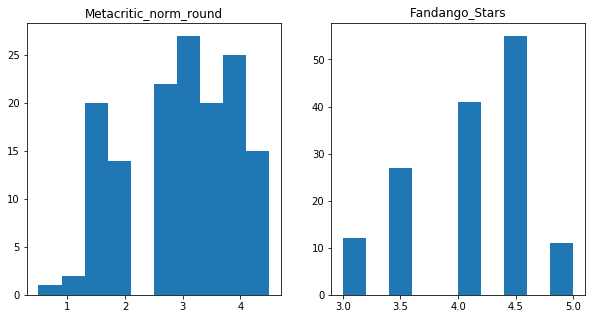

In [60]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.hist(movies['Metacritic_norm_round'])
ax2.hist(movies['Fandango_Stars'])

ax1.set_title('Metacritic_norm_round')
ax2.set_title('Fandango_Stars')

#### Data Description
*  The __Metacritic_norm_round__ data set appears to have a normal-ish looking distributation with the majority of movies getting a score betwween 3-4.
*  The __Fandango_Stars__ data set seems a bit odd as there are very few movies with a rating under 4, and no movies what so ever with a rating under 3.  The rating seems a bit skewed to higher values.

## <font color=blue>03 Mean, Median, and Standard Deviation</font>
*  Calculate the mean of both __Fandango_Stars__ and __Metacritic_norm_round__.
*  Calculate the median of both __Fandango_Stars__ and __Metacritic_norm_round__.
*  Calculate the standard deviation of both __Fandango_Stars__ and __Metacritic_norm_round__. You can use the *numpy.std()* method to find this.
*  Print out all the values and look over them.
*  Look at the review methodologies for [Metacritic](http://www.metacritic.com/) and [Fandango](https://www.fandango.com/). You can find the methodologies on their websites, or by using [Google](https://www.google.com/). Do you see any major differences? Write them up in a markdown cell.
*  Write up the differences in numbers in a markdown cell, including the following:
  *  Why would the median for __Metacritic_norm_round__ be lower than the mean, but the median for __Fandango_Stars__ is higher than the mean? Recall that the mean is usually larger than the median when there are a few large values in the data, and lower when there are a few small values.
  *  Why would the standard deviation for __Fandango_Stars__ be much lower than the standard deviation for __Metacritic_norm_round__?
  *  Why would the mean for __Fandango_Stars__ be much higher than the mean for __Metacritic_norm_round__.

In [61]:
mean_Metacritic_norm = movies['Metacritic_norm_round'].mean()
median_Metacritic_norm = movies['Metacritic_norm_round'].median()
std_dev_Metacritic_norm = movies['Metacritic_norm_round'].std()
print('Metacritic_norm_round Descriptive Stats:\n\t-mean: {mn}\n\t-median: {md}\n\t-Standard Deviation: {sd}'.format(mn=mean_Metacritic_norm, md=median_Metacritic_norm, sd=std_dev_Metacritic_norm))

mean_Fandango_Stars = movies['Fandango_Stars'].mean()
median_Fandango_Stars = movies['Fandango_Stars'].median()
std_dev_Fandango_Stars = movies['Fandango_Stars'].std()
print('\nFandango_Stars Descriptive Stats:\n\t-mean: {mn}\n\t-median: {md}\n\t-Standard Deviation: {sd}'.format(mn=mean_Fandango_Stars, md=median_Fandango_Stars, sd=std_dev_Fandango_Stars))

Metacritic_norm_round Descriptive Stats:
	-mean: 2.9726027397260273
	-median: 3.0
	-Standard Deviation: 0.9909605613743364

Fandango_Stars Descriptive Stats:
	-mean: 4.089041095890411
	-median: 4.0
	-Standard Deviation: 0.5403859779787333


#### Metacritic Scores Explained
*  Metascore is a weighted average in that they assign more importance, or weight, to some critics and publications than others, based on their quality and overall stature. In addition, for music and movies, we also normalize the resulting scores (akin to "grading on a curve" in college), which prevents scores from clumping together.
*  Metascore does not include user votes in the score
*  Metascore takes the credability of critics evaluations into consiteration.
*  The median is slighly higher than the mean.  This indicates that there are a few low end outliers that are pulling the mean down, which will less significatly impact the median.
*  The realistic distributation of scores ranging from 1-5 is going to create a Standard Deviation which is logical.


#### Fandango Scores Explained
*  Fandango has a practice of rounding scores up to the nearest 0.5.  Meaning if a move had a score of 4.1 it would be rounded up to 4.5. This is quite obviously going to skew the score artifically to higher numbers.
*  Fandango has a financial encentive to inflate movie ratings.
  1.  Fandango is owned by NBCUniversal.  
  1.  You can purchase tickets directly from Fandango.
  1.  It is obviously in their best interest to skew ratings higher to encourage people to buy movie tickest from them and to see movies made by NBCUniversal.
*  The median is slighly lower than the mean.  This indicates that there are a few high end outliers that are pulling the mean up, which will less significatly impact the median.  This is probably related to their rounding practices.
*  Since the scrores are artifically inflated to encourage people to see movies, there are no movies with a rating under 3; scores range from 3-5.  This is going to yield a tigher Standard Deviation as compared to the Metacritic scores.

## <font color=blue>04 Scatter Plots</font>
*  Make a scatterplot that compares the __Fandango_Stars__ column to the __Metacritic_norm_round__ column.
*  Several movies appear to have low ratings in Metacritic and high ratings in Fandango, or vice versa. We can explore this further by finding the differences between the columns.
  *  Subtract the __Fandango_Stars__ column from the __Metacritic_norm_round__ column, and assign to a new column, __fm_diff__, in __movies__.
  *  Assign the absolute value of __fm_diff__ to __fm_diff__. This will ensure that we don't only look at cases where __Metacritic_norm_round__ is greater than __Fandango_Stars__.
    *  You can calculate absolute values with the [absolute](https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.absolute.html) function in NumPy.
  *  Sort movies based on the __fm_diff__ column, in descending order.
  *  Print out the top __5__ movies with the biggest differences between __Fandango_Stars__ and __Metacritic_norm_round__.

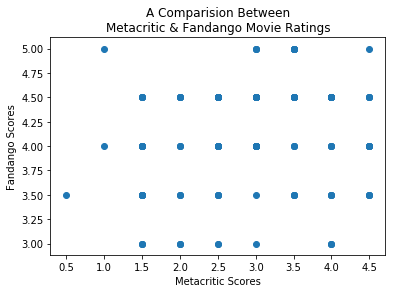

In [62]:
fig, ax = plt.subplots()
ax.scatter(movies['Metacritic_norm_round'], movies['Fandango_Stars'])
ax.set_ylabel('Fandango Scores')
ax.set_xlabel('Metacritic Scores')
ax.set_title('A Comparision Between\nMetacritic & Fandango Movie Ratings')

In [63]:
movies['fm_diff'] = np.absolute(movies['Fandango_Stars'] - movies['Metacritic_norm_round'])
movies.sort_values(by=['fm_diff'], inplace=True, ascending=False)
movies[['FILM','Fandango_Stars', 'Metacritic_norm_round', 'fm_diff']].head(5)

,FILM,Fandango_Stars,Metacritic_norm_round,fm_diff
3,Do You Believe? (2015),5.0,1.0,4.0
85,Little Boy (2015),4.5,1.5,3.0
47,Annie (2014),4.5,1.5,3.0
19,Pixels (2015),4.5,1.5,3.0
134,The Longest Ride (2015),4.5,1.5,3.0


## <font color=blue>05 Correlations</font>
*  Calculate the r-value measuring the correlation between __Fandango_Stars__ and __Metacritic_norm_round__ using the [scipy.stats.pearsonr](https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.stats.pearsonr.html) function.
*  The correlation is actually fairly low. Write up a markdown cell that discusses what this might mean.
*  Use the [scipy.stats.linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) function create a linear regression with __Metacritic_norm_round__ as the x-values and __Fandango_Stars__ as the y-values.
*  Predict what a movie that got a __3.0__ in Metacritic would get on Fandango using the formula __pred_3 = 3 * slope + intercept__.

In [64]:
def predict_Fandango(m, b, x_value_MetacriticScore):
    return (m * x_value_MetacriticScore) + b

r_value, p_value = pearsonr(movies['Metacritic_norm_round'], movies['Fandango_Stars'])
print('r-value:', r_value)

slope, intercept, r_value, p_value, stderr_slope = linregress(movies['Metacritic_norm_round'], movies['Fandango_Stars'])
predicted_Fandango_Score = predict_Fandango(slope, intercept, x_value_MetacriticScore = 3)
print('The predicted Fandango score assuming a Metacritic score of 3 is\n{fs}'.format(fs=predicted_Fandango_Score))

r-value: 0.178449190739
The predicted Fandango score assuming a Metacritic score of 3 is
4.091707152821203


#### Data Description...
*  The r-value of ~0.18 indicates a poor corrleation between the score of __Fandango__ and __Metacritic__.  Therefore using a regression generated from this data set would yield a fairly inaccurate means of prediction.
*  Furthermore, the poor coorleation means that the Fandango scores aren't simply inflated, but they are fundamentally different.  This is likely related to the lack in transparency Fandango provides in the calculation their scores.  It would be interesting to compare Fandango scores of movies made by NBCUniversal and Fandango scores of movies __NOT__ made by NBCUniversal.
*  However, since the r-value is positive, this means that they do both trend up together and not trend with an inverse relatioship.

## <font color=blue>06 Finding Residuals</font>
*  Predict what a movie that got a __1.0__ in Metacritic would get on Fandango using the line from the last screen.
*  Predict what a movie that got a __5.0__ in Metacritic would get on Fandango using the line from the last screen.
*  Make a scatter plot using the [scatter](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter) function in __matplotlib.pyplot__.
*  On top of the scatter plot, use the [plot](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) function in __matplotlib.pyplot__ to plot a line using the predicted values for __1.0__ and __5.0__.
  *  Setup the __x__ values as the list __[1.0, 5.0]__.
  *  The __y__ values should be a list with the corresponding predictions.
  *  Pass in both __x__ and __y__ to [plot](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) to create a line.
*  Set the x-limits of the plot to __1__ and __5__ using the [pyplot.xlim()](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.xlim) method.
*  Show the plot.

In [65]:
predict_one = predicted_Fandango_Score = predict_Fandango(slope, intercept, x_value_MetacriticScore = 1)
predict_five = predicted_Fandango_Score = predict_Fandango(slope, intercept, x_value_MetacriticScore = 5)
print('The predicted Fandango score assuming a Metacritic score of 1 is\n{fs}'.format(fs=predict_one))
print('The predicted Fandango score assuming a Metacritic score of 5 is\n{fs}'.format(fs=predict_five))

The predicted Fandango score assuming a Metacritic score of 1 is
3.8970849968733465
The predicted Fandango score assuming a Metacritic score of 5 is
4.28632930876906


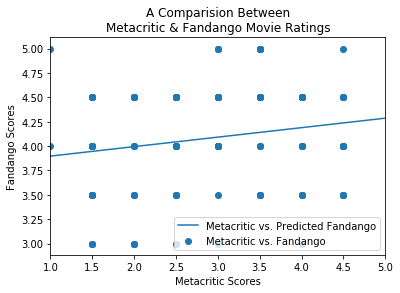

In [74]:
fig, ax = plt.subplots()
ax.scatter(movies['Metacritic_norm_round'], movies['Fandango_Stars'], label='Metacritic vs. Fandango')
ax.plot([1,5], [predict_one, predict_five], label='Metacritic vs. Predicted Fandango')

ax.set_ylabel('Fandango Scores')
ax.set_xlabel('Metacritic Scores')
ax.set_title('A Comparision Between\nMetacritic & Fandango Movie Ratings')
ax.set_xlim(1,5)
plt.legend(loc='best')
plt.show()